## Задание
1. Выполнить предобработку текстов выбранного писателя. Инструментарий предобработки оформить в виде метода.

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import numpy as np

nlp = spacy.load('ru_core_news_sm')

In [2]:
import os

folder_path = r'D:\workspace\hw\hw_task_majorIT\NLP (Чавычалов)\preprocessing'
files = os.listdir(folder_path)
txt_files = [f for f in files if f.endswith('.txt')]
for file in txt_files:
    print(file)

БарнебиРадж1841.txt
ДомбиИсын1848.txt
ЖизньИприключенияМартинаЧезлвита1844.txt
КрошкаДоррит1857.txt
ПриключенияОливераТвиста1839.txt
ХолодныйДом1853.txt


In [1]:
class Text_Book():
    def __init__(self, name_book) -> None:
        self.name_book = name_book
        self.text = self.get_text()
        self.words = self.get_words_text()
        self.nlp = spacy.load('ru_core_news_sm')
        self.doc = self.nlp(self.text)
        self.lemm = nltk.WordNetLemmatizer()

    def get_text(self):
        with open(f'{self.name_book}.txt', 'r', encoding='utf-8') as f:
            text = f.read()
        tokens = word_tokenize(text)
        return ' '.join(tokens) 
    
    def get_words_text(self):
        return nltk.tokenize.RegexpTokenizer(r"\w+").tokenize(self.text)
    
    def get_lemma_words(self):
        return [token.lemma_ for token in self.doc if not token.is_punct and not token.is_stop]
    
    def cosine_similarity(self, other):
        words = set(self.get_lemma_words()).union(set(other.get_lemma_words()))
        vec_1, vec_2 = np.array([self.get_lemma_words().count(word) for word in words]), np.array([other.get_lemma_words().count(word) for word in words])
        return np.dot(vec_1, vec_2) / (np.linalg.norm(vec_1) * np.linalg.norm(vec_2))

In [5]:
words_1839 = Text_Book("ПриключенияОливераТвиста1839").get_lemma_words()
words_1841 = Text_Book("БарнебиРадж1841").get_lemma_words()
words_1844 = Text_Book("ЖизньИприключенияМартинаЧезлвита1844").get_lemma_words()
words_1848 = Text_Book("ДомбиИсын1848").get_lemma_words()
words_1853 = Text_Book("ХолодныйДом1853").get_lemma_words()
words_1857 = Text_Book("КрошкаДоррит1857").get_lemma_words()
print(len(words_1839), len(words_1841), len(words_1844), len(words_1848), len(words_1853), len(words_1857))

83419 129922 170810 1320 189586 1229


## Задание
2. Посчитать косинусное сходство текстов. Оформить также в виде метода. Допустимые библиотеки: numpy и sklearn.



Формула для косинусного расстояния:то чем более схожи векторы (объекты), тем меньше косинусное расстояние (поэтому оно иногда называется косинусная близость).

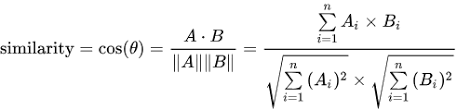
 
Где dot(a, b) - скалярное произведение векторов, а norm - норма вектора, квадратный корень из суммы квадратов элементов вектора.

In [7]:

similarity_1839_vs_1841 = words_1839.cosine_similarity(words_1841)
similarity_1839_vs_1844 = words_1839.cosine_similarity(words_1844)
similarity_1839_vs_1848 = words_1839.cosine_similarity(words_1848)
similarity_1839_vs_1853 = words_1839.cosine_similarity(words_1853)
similarity_1839_vs_1857 = words_1839.cosine_similarity(words_1857)
print(similarity_1839_vs_1841, similarity_1839_vs_1844,similarity_1839_vs_1848,similarity_1839_vs_1853,similarity_1839_vs_1857)

0.7359517654362177 0.7692130792012323 0.6613829758816456 0.7432954375831234 0.5908507356704035


По косинусному сходству текста Диккенса за 1839 к другим его текстам более поздних годов можно сделать вывод, что тексты имеют схожую структуру, используют похожие слова или имеют похожий смысл. 